# Import Libraries

In [2]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import show

# Get the Data

In [3]:
#df=pd.read_csv("ks-projects-201801.csv") # arrick
df=pd.read_csv("ks-projects-201801.csv\ks-projects-201801.csv") # changed
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Dataset Checking

In [3]:
# Size of train.csv
print(df.shape[0], 'rows',',',df.shape[1],'columns')

378661 rows , 15 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
# Number of missing data in each column
df.isnull().sum().sort_values(ascending=False)

usd pledged         3797
name                   4
usd_goal_real          0
usd_pledged_real       0
country                0
backers                0
state                  0
pledged                0
launched               0
goal                   0
deadline               0
currency               0
main_category          0
category               0
ID                     0
dtype: int64

In [7]:
df0 = df[df['usd pledged'].isnull()]
df0.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


In [8]:
# Uniqueness of each columns
df.nunique().sort_values()

state                    6
currency                14
main_category           15
country                 23
category               159
deadline              3164
backers               3963
goal                  8353
usd_goal_real        50339
pledged              62130
usd pledged          95455
usd_pledged_real    106065
name                375764
launched            378089
ID                  378661
dtype: int64

In [9]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [16]:
df[df['state'] == 'live']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24,CA,185.65,472.88,2396.36
183,1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.00,live,4,US,200.00,310.00,5000.00
458,1002183790,The Man in the Field,Horror,Film & Video,GBP,2018-01-08,850.0,2017-12-21 11:19:18,413.00,live,11,GB,13.39,563.32,1159.38
537,1002599057,Dear Atlantas,Film & Video,Film & Video,USD,2018-02-16,2000.0,2017-12-18 02:48:27,5.00,live,1,US,5.00,5.00,2000.00
544,1002629894,Art Calendar 2018,Illustration,Art,MXN,2018-01-06,1000.0,2017-12-21 05:34:12,0.00,live,0,MX,0.00,0.00,52.32
627,100301082,"Feliz año nuevo, mamá.",Theater,Theater,MXN,2018-02-04,49000.0,2017-12-06 03:36:06,1000.00,live,2,MX,53.52,52.32,2563.83
641,1003104071,One GuitarMan Band,Music,Music,EUR,2018-01-17,2000.0,2017-12-18 00:02:46,0.00,live,0,IT,0.00,0.00,2427.39
752,1003665581,Durango Falls TV Show,Film & Video,Film & Video,USD,2018-01-20,10000.0,2017-11-21 10:56:11,1.00,live,1,US,0.00,1.00,10000.00
783,1003819770,GrandLo Café,Drinks,Food,USD,2018-01-19,25000.0,2017-11-20 19:54:51,9097.00,live,38,US,3438.00,9097.00,25000.00
842,100411349,E Coin Mining and Rig-Building Workshop,Hardware,Technology,USD,2018-01-06,3100.0,2017-11-22 20:28:28,225.00,live,9,US,75.00,225.00,3100.00


In [9]:
df['deadline'].sort_values()

138572    2009-05-03
213711    2009-05-16
342226    2009-05-16
28960     2009-05-20
196244    2009-05-22
122662    2009-05-26
235255    2009-05-29
345606    2009-05-29
148270    2009-05-29
357003    2009-05-31
113932    2009-05-31
169268    2009-05-31
359589    2009-06-01
344433    2009-06-01
329525    2009-06-01
19872     2009-06-01
98954     2009-06-01
215127    2009-06-02
163014    2009-06-02
62205     2009-06-04
59959     2009-06-05
262521    2009-06-05
334180    2009-06-06
19561     2009-06-06
241024    2009-06-09
300133    2009-06-12
301964    2009-06-12
260958    2009-06-14
16072     2009-06-15
88752     2009-06-15
             ...    
17851     2018-02-26
17504     2018-02-26
101664    2018-02-26
184358    2018-02-26
58856     2018-02-27
129912    2018-02-27
25786     2018-02-27
59814     2018-02-27
219083    2018-02-28
285616    2018-02-28
239283    2018-02-28
302265    2018-02-28
149878    2018-02-28
361314    2018-02-28
168323    2018-02-28
227412    2018-02-28
271100    201

In [10]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

Ticket and PassengerId have too many distinct values; These columns will be excluded
Age, Cabin, Fare and Name have too many varies. These columns need to be reshaped

In [56]:
df.groupby(['main_category', 'category']).max()

ID  backers country currency  \
main_category category                                                  
Art           Art                2147446058     9665      US      USD   
              Ceramics           2144529772     1079      US      USD   
              Conceptual Art     2147460119     1633      US      USD   
              Digital Art        2145456514     2829      US      USD   
              Illustration       2146866105     7362      US      USD   
              Installations      2141215460     1185      US      USD   
              Mixed Media        2146288615     5030      US      USD   
              Painting           2146928083     1862      US      USD   
              Performance Art    2146199323      971      US      USD   
              Public Art         2147300055    22834      US      USD   
              Sculpture          2145181363     9417      US      USD   
              Textiles           2138528459     1165      US      USD   
              Video Art          2137925160      359      US      USD   
Comics        Anthologies        2144705605     5553      US      USD   
              Comic Books        2146964629     2708      US      USD   
              Comics             2146970878    14952      US      USD   
              Events             2113663299     1187      US      USD   
              Graphic Novels     2147266948     6435      US      USD   
              Webcomics          2146401282     7119      US      USD   
Crafts        Candles            2141042688      487      US      USD   
              Crafts             2147394426    12705      US      USD   
              Crochet            2140575984      143      US      USD   
              DIY                2145947486     1508      US      USD   
              Embroidery         2137187299      212      US      USD   
              Glass              2140997829      334      US      USD   
              Knitting           2145521271      725      US      USD   
              Letterpress        2113269716      374      US      USD   
              Pottery            2145868789      523      US      USD   
              Printing           2140334089      668      US      USD   
              Quilts             2136181719      307      US      USD   
...                                     ...      ...     ...      ...   
Publishing    Poetry             2142336393     1688      US      USD   
              Publishing         2147448229    15352      US      USD   
              Radio & Podcasts   2146763433    21808      US      USD   
              Translations       2136219645      429      US      USD   
              Young Adult        2146058319     1199      US      USD   
              Zines              2144539850     1862      US      USD   
Technology    3D Printing        2141442413    16538      US      USD   
              Apps               2147224550    11281      US      USD   
              Camera Equipment   2145170613    15766      US      USD   
              DIY Electronics    2144961863    12277      US      USD   
              Fabrication Tools  2139707904     6196      US      USD   
              Flight             2147003744    24066      US      USD   
              Gadgets            2147016701    28138      US      USD   
              Hardware           2146222274    39560      US      USD   
              Makerspaces        2133891526      762      US      USD   
              Robots             2147388069     7857      US      USD   
              Software           2147345648    35549      US      USD   
              Sound              2144996032    25412      US      USD   
              Space Exploration  2145934754    23331      US      USD   
              Technology         2147455254    70122      US      USD   
              Wearables          2143664881    26828      US      USD   
              Web                2146225626   105857      US      USD   
Theater       Comedy      

In [ ]:
df.pivot_table([''])

# What is the most popular project by category?

In [36]:
category_count = df.main_category.value_counts()
category_count

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

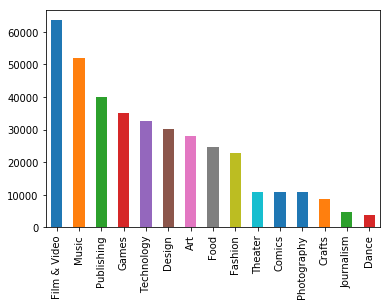

In [37]:
category_count.plot.bar()

# Data Visualization

### State = Successful

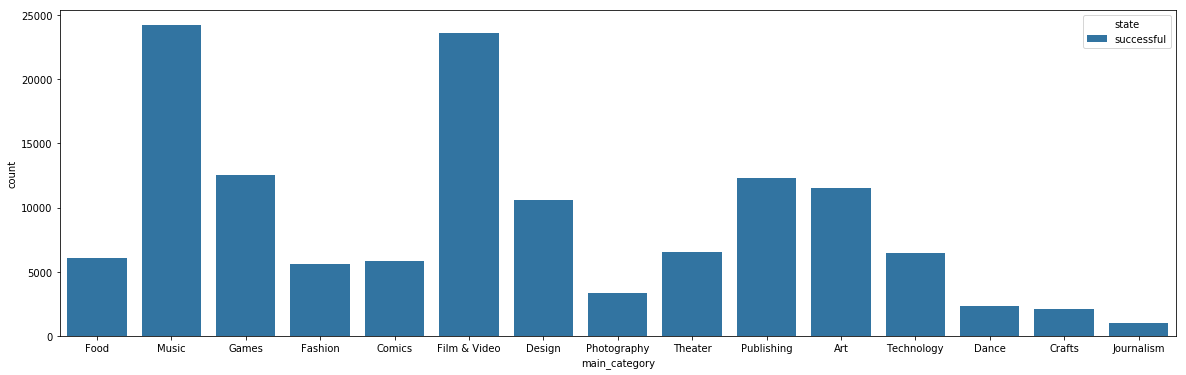

In [11]:
fig, axes = plt.subplots(figsize=(20,6))
#Survival_palette = {0: "black", 1: "orange"}
sns.countplot(x="main_category", hue="state", data=df[df.state == 'successful'])
show()

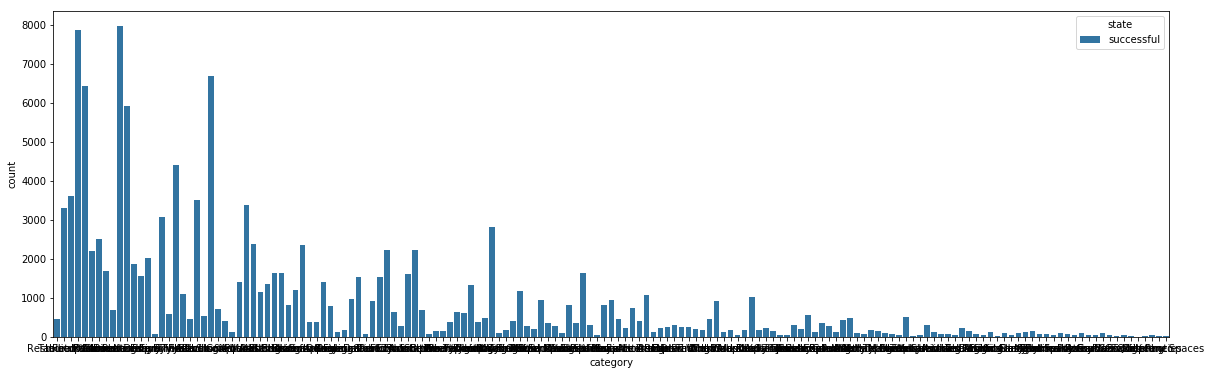

In [4]:
fig, axes = plt.subplots(figsize=(20,6))
#Survival_palette = {0: "black", 1: "orange"}
sns.countplot(x="category", hue="state", data=df[df.state == 'successful'])
show()

# Which most successful category for each?

In [49]:
def calculate_categorical_data_survival_rates(data, category):
    category_data = data[['state',category]]
    #print(category_data)
    
    category_totals = category_data.groupby([category]).size()
    category_survival_totals = category_data[category_data.state == 'successful'].groupby([category]).size()
    
    append_zero_for_missing_indices(category_totals, category_survival_totals)
    
    survival_rates = category_survival_totals/category_totals
    survival_rates.name = "Success Rates"
    return survival_rates

def append_zero_for_missing_indices(data1, data2):
    missing_indices = data1.index.difference(data2.index)
    for index in missing_indices:
        data2.loc[index] = 0
        
def plot_success_rate(data, column):
    success_rate = calculate_categorical_data_survival_rates(data, column)
    success_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])

In [12]:
survival_rate = df[df.state == 'successful'].groupby(["main_category"]).size() / df.groupby(["main_category"]).size()

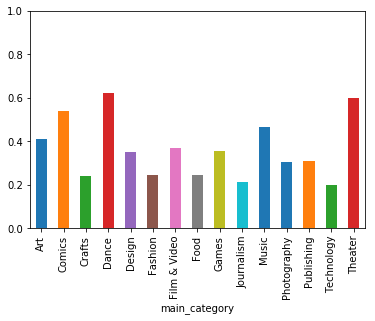

In [48]:
survival_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])

In [44]:
main_category_success_rate = calculate_categorical_data_survival_rates(df,'main_category')

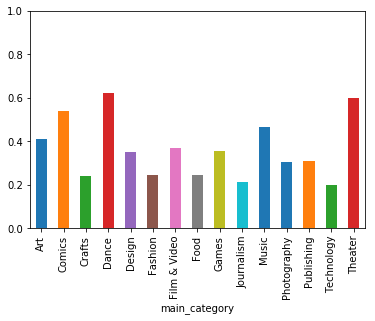

In [51]:
plot_success_rate(df, "main_category")

In [ ]:
plot_success_rate(df, )

# Which country has the most backers?

In [18]:
df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [31]:
backers_origin_count = df['country'].value_counts().sort_values(ascending=False)[:5]
backers_origin_count

US    292627
GB     33672
CA     14756
AU      7839
DE      4171
Name: country, dtype: int64

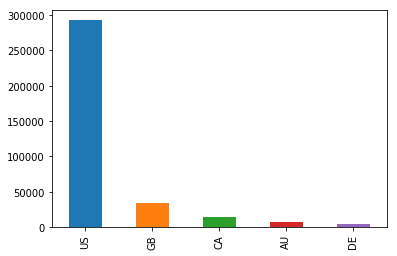

In [32]:
#fig = plt.figure(figsize=(400,100))
backers_origin_count.plot.bar()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
jason = df[(df['usd_goal_real'] <= df['usd_pledged_real']) & (df['state'] == 'failed')]
jason

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
16780,1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,23000.0,2013-03-05 10:55:56,23020.01,failed,141,US,23020.01,23020.01,23000.0
58558,1297794474,Music Empowers - A Day with the Accende Ensemble,Classical Music,Music,USD,2012-01-04,3000.0,2011-11-07 15:20:24,3087.50,failed,20,US,3087.50,3087.50,3000.0
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,USD,2010-08-20,3600.0,2010-07-21 05:48:11,3600.00,failed,30,US,3600.00,3600.00,3600.0
216545,2103203254,The new face of Canadian Science Fiction,Fiction,Publishing,USD,2010-05-16,10000.0,2010-03-18 04:35:31,10797.00,failed,66,US,10797.00,10797.00,10000.0
298960,59246799,Key Wrench - Unlock Your Life!,Product Design,Design,USD,2013-10-04,6000.0,2013-08-24 05:42:10,6183.00,failed,208,US,6183.00,6183.00,6000.0
337790,790638930,From Neurons to Nirvana: The Great Medicines,Documentary,Film & Video,USD,2011-09-23,40000.0,2011-07-25 20:35:41,40000.00,failed,113,US,40000.00,40000.00,40000.0


In [54]:
jason2 = df[(df['usd_goal_real'] > df['usd_pledged_real']) & (df['state'] == 'successful')]
jason2.loc[:,'pledge diff'] = jason2['usd_goal_real'] - jason2['usd_pledged_real']
jason2

C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge diff
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0.31
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,5284.00
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0.35
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0.34
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,119.91
